In [1]:
%matplotlib widget

In [2]:
from BIOViewer import EventViewer
from BIOViewer import EventConfig
import os
import pandas as pd
import numpy as np
import sys
sys.path.append('../../Scripts')
from local_utils import all_referential, cut_and_jitter


In [3]:
os.listdir('/media/moritz/internal_expansion/Data/Bonobo')

['cluster_center',
 'random_snippets_reduced_montage',
 'cluster_center_reduced_montage',
 'continuous',
 'cluster_members',
 'random_snippets']

,event_file,fraction_of_yes,pred,ChannelLocation,Spike
0,UAB0006_70,-1,0.010804,general,0
1,UAB0005_317,-1,0.005873,general,0
2,YALE0007_2,-1,0.041247,general,0
3,MAYO0018_157,-1,0.032342,general,0
4,UAB0005_181,-1,0.005896,general,0
...,...,...,...,...,...
1422,UAB0005_172,-1,0.001893,general,1
1423,UAB0006_259,-1,0.024955,general,0
1424,YALE0019_221,-1,0.010251,general,0
1425,UAB0006_223,-1,0.003412,general,1


In [13]:
titles = list('File: '+df.event_file + '\nPred ' +df.pred.astype(str)+ '\nSpike: '+df.Spike.astype(str))

18690       UAB0006_70\n0.01080364\n
18134     UAB0005_317\n0.005873226\n
19544      YALE0007_2\n0.041246805\n
16620     MAYO0018_157\n0.03234214\n
17980     UAB0005_181\n0.005896117\n
                    ...             
18062    UAB0005_172\n0.0018925788\n
18471     UAB0006_259\n0.024955258\n
19611    YALE0019_221\n0.010250934\n
18606    UAB0006_223\n0.0034119955\n
17110     MEG0024_116\n0.045248333\n
Length: 1427, dtype: object

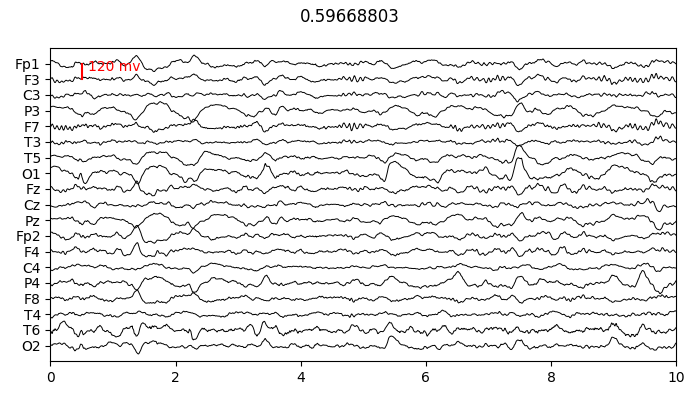

In [18]:
channels = all_referential
Fs = 128
data = 'Bonobo'
if data == 'Clemson':
    path_folder = '/media/moritz/Expansion/Data/Spikes_clemson_10s/preprocessed_npy'
    df = pd.read_csv('../../Models/generalized_all_ref_loc/results_localized_Clemson.csv')
    df_loc = pd.read_excel('/media/moritz/Expansion/Data/Spikes_clemson_10s/tables/segments_labels_channels_montage.xlsx')
    df = df.merge(df_loc[['event_file','Spike']])
    df = df[df.ChannelLocation=='general']
    titles = list('File: '+df.event_file + '\nPred ' +df.pred.astype(str)+ '\nSpike: '+df.Spike.astype(str))
    path_files = [os.path.join(path_folder,f+'.npy') for f in df.event_file]
    scale = 10

if data =='Bonobo':
    path_folder = '/media/moritz/internal_expansion/Data/Bonobo/cluster_center'
    df = pd.read_csv('../../Models/generalized_all_ref_loc/results_localized_BonoboLocal.csv')
    df = df[df.fraction_of_yes<0.2]
    path_files = [os.path.join(path_folder,f+'.npy') for f in df.event_file]
    scale = 120
    titles = df.pred.to_list()

loader = np.load
windowsize = 10
cutter = cut_and_jitter(windowsize,0,Fs)
signalconfig = EventConfig(path_files,loader,Fs,channels,scale= scale,unit='mv',transforms=[cutter])
viewer = EventViewer(signal_configs=[signalconfig],windowsize=windowsize,path_save='Figures',title=titles)

In [57]:
data =loader(path_files[0])

In [58]:
data.shape

(19, 1280)